## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [18]:
! git clone https://github.com/imdressel/knn

fatal: destination path 'knn' already exists and is not an empty directory.


**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

In [20]:
df = pd.read_csv('./knn/data/USA_cars_datasets.csv')

In [21]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [22]:
drop_list = ['Unnamed: 0','brand','model','title_status','color','vin','lot','state','country','condition']
df=df.drop(drop_list,axis=1)

In [23]:
df.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [24]:
df.shape

(2499, 3)

In [25]:
print(df['price'].unique)

<bound method Series.unique of 0        6300
1        2899
2        5350
3       25000
4       27700
        ...  
2494     7800
2495     9200
2496     9200
2497     9200
2498     9200
Name: price, Length: 2499, dtype: int64>


In [26]:
# we can use describe to see if there are any nans
df.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


There are no nans to handle. We see that there are 2499 observations for each variable, and there are 2499 rows in the dataset.

2. Maxmin normalize `year` and `mileage`.


In [27]:
# we can define a maxmin scalar function
def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return(z)

df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

In [28]:
print(df['year'].unique())
print(df['mileage'].unique())

[0.74468085 0.80851064 0.95744681 0.87234043 0.78723404 0.93617021
 0.76595745 0.85106383 0.89361702 1.         0.91489362 0.
 0.63829787 0.9787234  0.61702128 0.57446809 0.59574468 0.68085106
 0.82978723 0.70212766 0.72340426 0.53191489 0.65957447 0.44680851
 0.5106383  0.4893617  0.55319149 0.23404255 0.46808511 0.42553191]
[0.26928707 0.18719448 0.03889243 ... 0.03394418 0.03198335 0.03081824]


3. Split the sample into ~80% for training and ~20% for evaluation.


In [29]:
# we can use train_test_split to divide the data
from sklearn.model_selection import train_test_split
y = df['price'] # target variable
X = df.drop('price',axis=1) # feature variables
X_train, X_test, y_train, y_test = train_test_split(X,y, # feature and target variables
                                                    test_size=0.2, # split the sample 80 train/20 test
                                                    random_state=100) # for reproducibility

In [30]:
print(X_train)

          year   mileage
2460  0.957447  0.036792
1707  0.936170  0.098162
54    0.978723  0.041897
1735  0.978723  0.048386
2188  0.978723  0.028750
...        ...       ...
350   0.978723  0.020482
1930  0.957447  0.003947
79    0.978723  0.041056
1859  0.978723  0.021625
1544  0.978723  0.016332

[1999 rows x 2 columns]


4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?


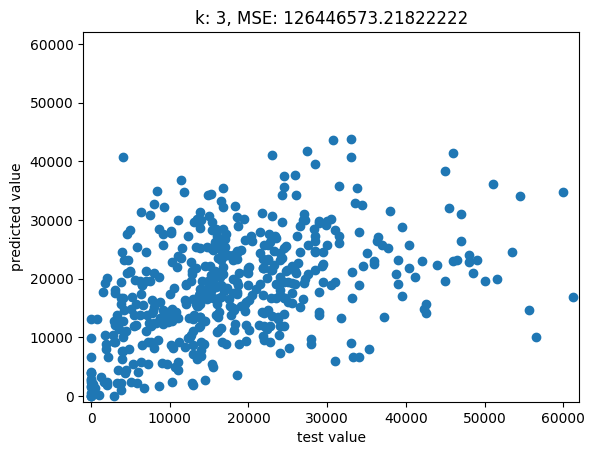

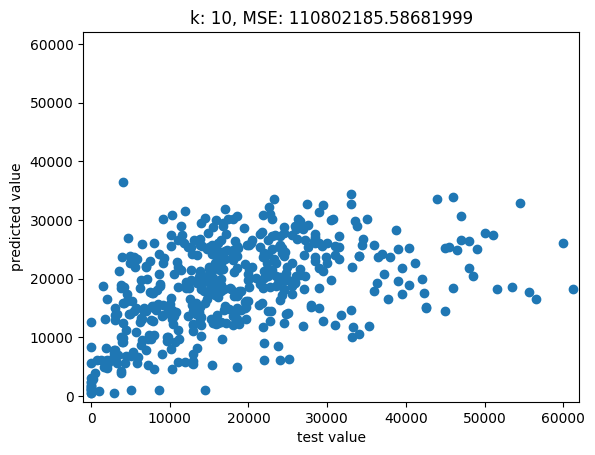

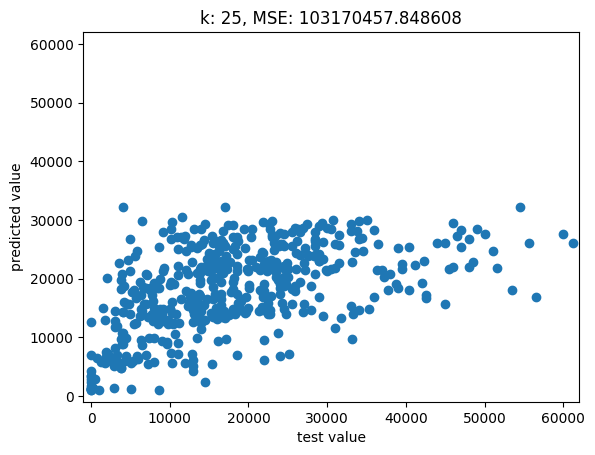

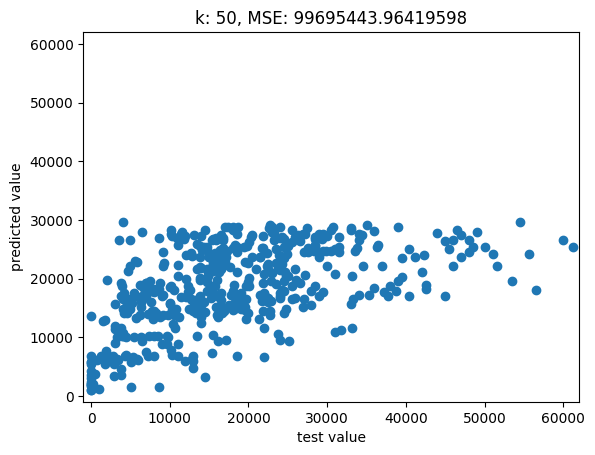

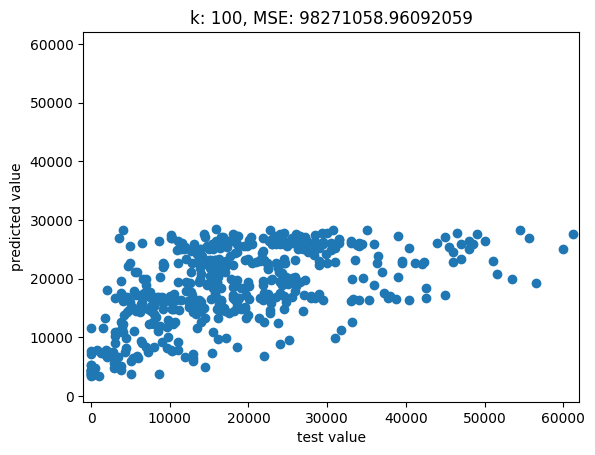

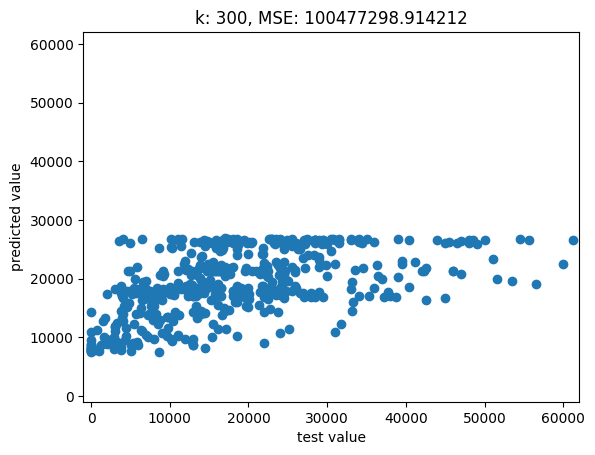

In [31]:
klist = [3,10,25,50,100,300]
MSE = np.zeros(klist) # store MSE here

for k in klist:
  model = KNeighborsRegressor(n_neighbors=k) # create a sk model for k
  fitted_model = model.fit(X_train,y_train) # train the model on our data
  y_hat = fitted_model.predict(X_test) # predict values for test set
  MSE = np.sum((y_test - y_hat)**2)/len(y_test)

  # scatter test value against predicted value
  plt.figure()
  plt.scatter(y_test,y_hat)
  plt.title('k: '+str(k)+', MSE: '+str(MSE))
  plt.xlabel('test value')
  plt.ylabel('predicted value')
  plt.xlim(-1000,62000)
  plt.ylim(-1000,62000)
  plt.show()


**What patterns do you notice as you increase  k ?**
As we increase k, the number of large outliers decreases as the predicted values of y become closer to the mean (decrease in the range of y_hat). Once we get to k=300, there is horizontal bunching, with similar values of y_test having very similar values of y_hat. Overall, the y_hat vs y_test points are scattered for low k and get closer together for higher k. The MSE decreases from k = 3 to k = 100 and has a slight increase at k = 300.

5. Determine the optimal $k$ for these data.


[77]


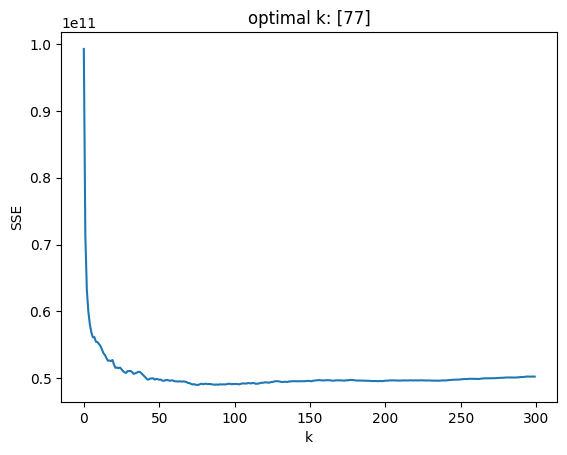

In [32]:
k_bar = 300
k_grid = np.arange(1,k_bar) # range of k's we will consider
SSE = np.zeros(k_bar) # to store SSE

for k in range(k_bar):
  fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test) # predict values for test set
  SSE[k] = np.sum((y_test-y_hat)**2)

SSE_min = np.min(SSE) # get the lowest recorded SSE
min_index = np.where(SSE==SSE_min) # find the indices of y that equal the minimum
k_star = k_grid[min_index] # find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # plot SSE by k
plt.title("optimal k: "+str(k_star))
plt.xlabel("k")
plt.ylabel('SSE')
plt.show()

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

We found that the optimal k is 77. When we set k to 300, the model was likely overfitting the data. We can see this through the horizontal bunching of prediced values in the figure for k=300 from question 4. The bunched values suggest that regardless of variations in the test value, the model predicts a same/similar predicted value. At this point, similar test values exhibit a lot of influence on the model predictions, which is why the horizonal bunches form.

For lower values of k (e.g., k=3,10,25), the model is underfitting the data. For these values, the predictions have high variance and low precision. As k increases, the range of our predictions shrinks. We see less high outlier values, and predictions move closer to the average.

For values of k close to the optimal value (e.g. 50 and 100), we see similar results.

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./knn/data/heart_failure_clinical_records_dataset.csv')

# we can use df.shape and df.describe() to see if there are any NAs to handle
print(df.shape)
df.describe()
# there are no NA's to handle. The number of rows equals the number of observations for all variables.

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


There are no NA's to handle. The number of rows equals the number of observations for all variables.

In [34]:
df=df.drop('time',axis=1) # axis 1 drops the column

2. Make a correlation matrix. What variables are strongly associated with a death event?


In [35]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


What variables are strongly associated with a death event?

The variables with the strongest correlations to death event are age (0.254), ejection_fraction (-0.269), and serum_creatinine (0.294). However, these correlations are only weak/moderate.

3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?


In [36]:
# summary table is given by df.loc[:,[var,'DEATH_EVENT']].groupby(var).describe()
vars = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

for var in vars:
  print(df.loc[:,[var,'DEATH_EVENT']].groupby(var).describe())

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

We can see whether a higher portion of the population dies when the variable takes the value 1 rather than 0 through the means.

The mean death events are higher for people with anaemia (0.357) than for people without anaemia (0.294). Similarly, mean death events are higher for poeple with high blood pressure (0.371) than for people without high blood pressure (0.294). For sex, diabetes, and smoking, the mean death rate is almost the same for people and without the condition. Therefore, **anaemia and high blood pressure** are the strongest predictors.  

4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.


In [37]:
# variables most predictive of death (from q2): age, ejection_fraction, serum_creatinine
# from q3: anaemia, high blood pressure
y = df['DEATH_EVENT']
vars = ['age','ejection_fraction','serum_creatinine','anaemia','high_blood_pressure']
X = df.loc[:,vars]
X.head()

,age,ejection_fraction,serum_creatinine,anaemia,high_blood_pressure
0,75.0,20,1.9,0,1
1,55.0,38,1.1,0,0
2,65.0,20,1.3,0,0
3,50.0,20,1.9,1,0
4,65.0,20,2.7,1,0


5. Maxmin normalize all of the variables in `X`.


In [38]:
def maxmin(z):
  u = (z-min(z))/(max(z)-min(z))
  return u

X = X.apply(maxmin) # use .apply to do for all variables in the df

6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).


In [39]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [40]:
# trying it out this way
np.random.seed(100)
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) ) # Generate random indices for training set (80%)
test = [item for item in all if item not in train] # Find test indices (not included in the 80%)

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.


[6]


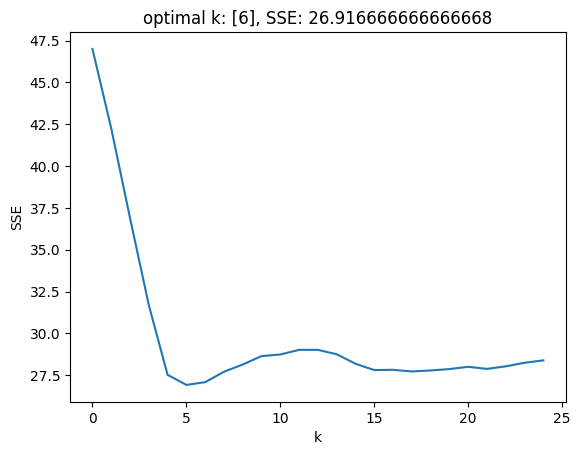

In [41]:
k_bar = 25
k_grid = np.arange(1,k_bar) # range of k's to consider
SSE = np.zeros(k_bar) # to store SSE

for k in range(k_bar):
  fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test) # predict values for test set
  SSE[k] = np.sum((y_test-y_hat)**2)

SSE_min = np.min(SSE) # get the lowest recorded SSE
min_index = np.where(SSE==SSE_min) # find indices of y that equal the minimum
k_star = k_grid[min_index] # optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # plot SSE by k
plt.title("optimal k: "+str(k_star) +', SSE: '+str(SSE_min))
plt.xlabel("k")
plt.ylabel("SSE")
plt.show()

8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [45]:
y = df['DEATH_EVENT']
X = df.drop('DEATH_EVENT',axis=1) # to drop the column
X = X.apply(maxmin)
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0


In [43]:
# split into 80% training and 20% evaluation
X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

[30]


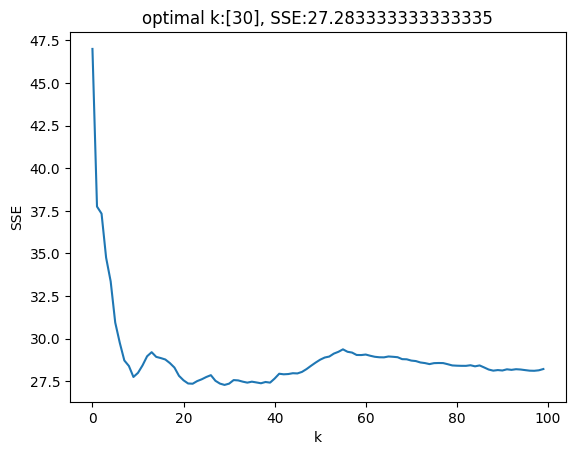

In [ ]:
# determine the optimal number of neighbors for kNN regression
from sklearn.neighbors import KNeighborsRegressor

# determine the optimal k:
k_bar = 100
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
  knn = KNeighborsRegressor(n_neighbors=k+1)
  predictor = knn.fit(X_train,y_train)
  y_hat = knn.predict(X_test)
  SSE[k] = np.sum((y_test-y_hat)**2)

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

The model with fewer variables (age, ejection_fraction, serum_creatinine, high_blood_pressure, and anaemia) has a slightly lower sum of squared error for the optimal k, at 26.92 compared to 27.28 for all variables. When we include more variables, we also have a higher optimal k, at 30 rather than at 6. The simpler model with fewer variables produces better results that are easier to interpret. This suggests that it isn't always better to include more variables. Rather, including fewer variables that have stronger contributions to the target variable can produce a simpler model that is more effective.

[23]


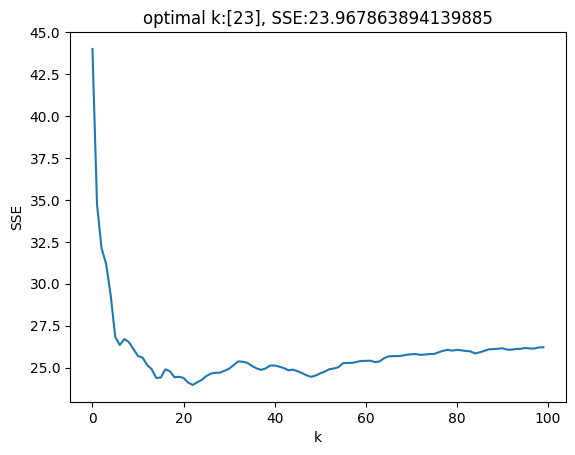

In [ ]:
# playing with the selection of variables more below:

# first, testing only the variables from question 2 (age, ejection_fraction,serum_creatinine)
y = df['DEATH_EVENT']
vars = ['age','ejection_fraction','serum_creatinine']
X = df.loc[:,vars]
X = X.apply(maxmin)
# split into 80% training and 20% evaluation
X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]
# determine the optimal k:
k_bar = 100
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
  knn = KNeighborsRegressor(n_neighbors=k+1)
  predictor = knn.fit(X_train,y_train)
  y_hat = knn.predict(X_test)
  SSE[k] = np.sum((y_test-y_hat)**2)

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

We can get a lower SSE with fewer variables, but a higher k. We are not including all of the most influential variables, so the other model we created before is still preferable

[16]


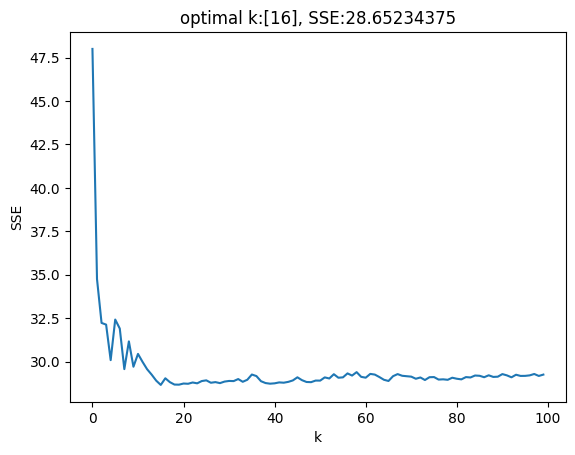

In [ ]:
# playing with the selection of variables more below:

# first, testing only the variables from question 2 (age, ejection_fraction,serum_creatinine)
y = df['DEATH_EVENT']
vars = ['high_blood_pressure','anaemia']
X = df.loc[:,vars]
X = X.apply(maxmin)
# split into 80% training and 20% evaluation
X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]
# determine the optimal k:
k_bar = 100
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
  knn = KNeighborsRegressor(n_neighbors=k+1)
  predictor = knn.fit(X_train,y_train)
  y_hat = knn.predict(X_test)
  SSE[k] = np.sum((y_test-y_hat)**2)

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

With only 2 variables (anaemia and high blood pressure), we have a higher SSE and higher k. This model does not do a good job at predicting death_event.

[1]


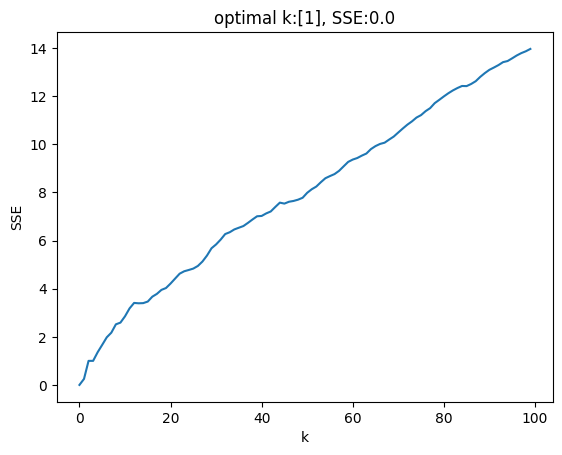

In [ ]:
# playing with the selection of variables more below:

# dropping only a few variables
y = df['DEATH_EVENT']
dropvars = ['platelets','serum_sodium','age']
X = df.drop(dropvars,axis=1)
X = X.apply(maxmin)
# split into 80% training and 20% evaluation
X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]
# determine the optimal k:
k_bar = 100
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
  knn = KNeighborsRegressor(n_neighbors=k+1)
  predictor = knn.fit(X_train,y_train)
  y_hat = knn.predict(X_test)
  SSE[k] = np.sum((y_test-y_hat)**2)

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

This model does not make sense. To create the best model, we need to select variables that are the most influential to the target variable. Adding more variables to our model does not necessarily make it better, and removing variables that are related to our target variable can worsen our model.

**Q3.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)